In [38]:
import pickle

from datautils import datautils

In [39]:
loader = datautils.Loader()
loader.load("data/characters/")
data = loader.to_dataframe()
loader.drop()

In [40]:
data.head()

,Name,DisplayName,Content,Crosslinks,Species,Gender,Affiliation(s),Homeworld,Died
0,%22Blue%22_Imcrix,"""Blue"" Imcrix","""Blue"" Imcrix was an infamous male Taloron cri...","[Star_Wars_Legends, Taloron, Gender/Legends, C...",Taloron,Male,NaN,NaN,NaN
1,%22Fugitive%22_Fod,"""Fugitive"" Fod","""Fugitive"" Fod was a male Yuzzum from Endor wh...","[Star_Wars_Legends, Endor/Legends, Yuzzum/Lege...",Yuzzum,Male,NaN,Endor,NaN
2,%22Shady%22_Pers,"""Shady"" Pers","""Shady"" Pers was a male Human smuggler living ...","[Star_Wars_Legends, Kashyyyk/Legends, Human/Le...",Human,Male,[Myyydril],Kashyyyk,NaN
3,%27Ndranth_Poussan,'Ndranth Poussan,'Ndranth Poussan was a Human male starfighter ...,"[Star_Wars_Legends, Wookieepedia:Good_articles...",Human,Male,"[Agamar Resistance, Alliance to Restore the Re...",Agamar,"[1 BBY, near Brigia]"
4,0761,0761,0761 was a stormtrooper who was stationed on C...,"[Star_Wars_Legends, 5_ABY/Legends, Ciutric_IV,...",Human,Male,"[Galactic EmpireStormtrooper Corps, Stormtroop...",NaN,"[5 ABY, Ciutric IV]"


In [41]:
with open('graph/universe.pickle', 'rb') as f:
    Universe = pickle.load(f)
len(Universe.nodes())

29435

In [42]:
outliers = [node for node in Universe.nodes() if Universe.degree(node) == 0]
len(outliers)

6462

In [43]:
outliers_data = data.loc[data['Name'].isin(outliers)]
outliers_data.head()

,Name,DisplayName,Content,Crosslinks,Species,Gender,Affiliation(s),Homeworld,Died
0,%22Blue%22_Imcrix,"""Blue"" Imcrix","""Blue"" Imcrix was an infamous male Taloron cri...","[Star_Wars_Legends, Taloron, Gender/Legends, C...",Taloron,Male,NaN,NaN,NaN
1,%22Fugitive%22_Fod,"""Fugitive"" Fod","""Fugitive"" Fod was a male Yuzzum from Endor wh...","[Star_Wars_Legends, Endor/Legends, Yuzzum/Lege...",Yuzzum,Male,NaN,Endor,NaN
3,%27Ndranth_Poussan,'Ndranth Poussan,'Ndranth Poussan was a Human male starfighter ...,"[Star_Wars_Legends, Wookieepedia:Good_articles...",Human,Male,"[Agamar Resistance, Alliance to Restore the Re...",Agamar,"[1 BBY, near Brigia]"
4,0761,0761,0761 was a stormtrooper who was stationed on C...,"[Star_Wars_Legends, 5_ABY/Legends, Ciutric_IV,...",Human,Male,"[Galactic EmpireStormtrooper Corps, Stormtroop...",NaN,"[5 ABY, Ciutric IV]"
7,1138_(First_Order),1138 (First Order),1138 was a human male stormtrooper who served ...,"[Canon, 1138, Special:Upload, Human, Gender, F...",Human,Male,"[First Order, Stormtrooper Corps, Stormtrooper...",NaN,NaN


In [44]:
outliers_aff_non_nan = outliers_data["Affiliation(s)"].dropna()
outliers_aff_non_nan.head()

3     [Agamar Resistance, Alliance to Restore the Re...
4     [Galactic EmpireStormtrooper Corps, Stormtroop...
7     [First Order, Stormtrooper Corps, Stormtrooper...
12                                    [Galactic Empire]
28    [Galactic Republic, Grand Army of the Republic...
Name: Affiliation(s), dtype: object

In [45]:
outliers_data["Crosslinks"].explode().value_counts()

Star_Wars_Legends              5850
Gender/Legends                 5306
Human/Legends                  2855
Color/Legends                  2334
Wookieepedia:Stub              2176
                               ... 
Hammer_Station                    1
Battle_station                    1
Mechanical_Liberation_Front       1
MerenData/Legends                 1
Challenge_37                      1
Name: Crosslinks, Length: 16883, dtype: int64

In [46]:
outliers_aff_non_nan.explode().value_counts()

Galactic Republic                    622
Sith Empire                          487
Galactic Empire                      471
Alliance to Restore the Republic     301
Jedi Order                           269
                                    ... 
Edan Spaceways                         1
Corellian Shipbuilders Union           1
Galactic EmpireMoff Lasre Dardano      1
Moff Lasre Dardano                     1
Rebel AllianceArdan resistance         1
Name: Affiliation(s), Length: 1476, dtype: int64

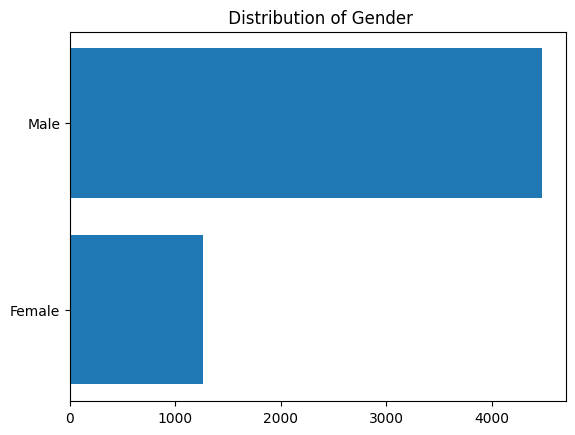

In [47]:
datautils.plot_series_distribution(outliers_data["Gender"], 2)

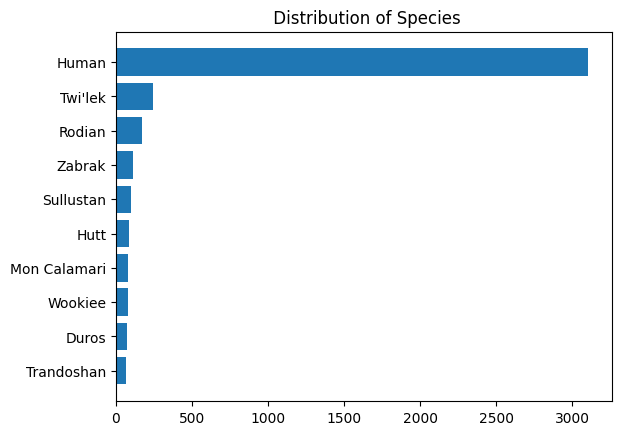

In [48]:
datautils.plot_series_distribution(outliers_data["Species"])

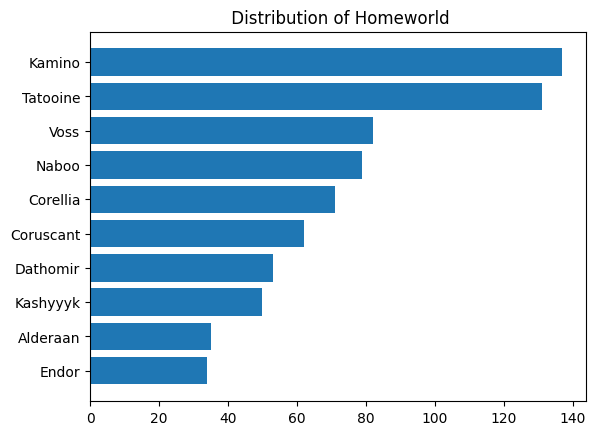

In [49]:
datautils.plot_series_distribution(outliers_data["Homeworld"].dropna().astype(str))